## Customer churn analysis
### This project is to determine which of our customers will abandon our services

#### Install the required python packages for this project

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import the necessary python packages

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### Import data from the data source

In [4]:
data = pd.read_csv('telco.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## DATA PRE-PROCESSING/ DATA CLEANING

In [5]:
# LETS UNDERSTAND THE DATA FIRST
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# LETS KNOW THE DATA TYPES OF THE FEATURES
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### LETS DEAL WITH THE COLUMNS/FEATURES WITH WRONG DATA TYPES

In [7]:
# THE TOTALCHARGES COLUMN IS A FLOATING DATA TYPE BUT PYTHON READS IT AS AN OBJECT, MEANING THERE IS AN ERROR WITHIN THAT COLUMN...WHICH WE NEED TO FIND OUT
data['TotalCharges'].dtype

dtype('O')

In [8]:
# First lets check if its an empty space thats causing the issue and then replace it with null
data['TotalCharges'] = data['TotalCharges'].replace(" ", None)

In [9]:
data['TotalCharges'].isnull().sum()

np.int64(11)

In [10]:
# convert the column to a float datatype
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].dtype

dtype('float64')

### LETS DEAL WITH MISSING VALUES

In [11]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# lets know the percentage of missing values in the dataset
missing_data_perc = (data['TotalCharges'].isnull().sum()/data['TotalCharges'].count()) 
print('The percentage of missing data is', missing_data_perc,'%')

The percentage of missing data is 0.0015642775881683731 %


In [13]:
# since the percentage of missing value is very small and relatively insignificant we will drop the missing value.
data = data.dropna(subset=['TotalCharges'])
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### LETS CARRY OUT EXPLORATORY DATA ANALYSIS TO KNOW WHAT IS HAPPENING IN THE DATA SET

In [14]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
data['Churn'] = data['Churn'].replace({'Yes':1, 'No':0})
data['Churn']

C:\Users\BOBBY\AppData\Local\Temp\ipykernel_14200\3511598500.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Churn'] = data['Churn'].replace({'Yes':1, 'No':0})


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

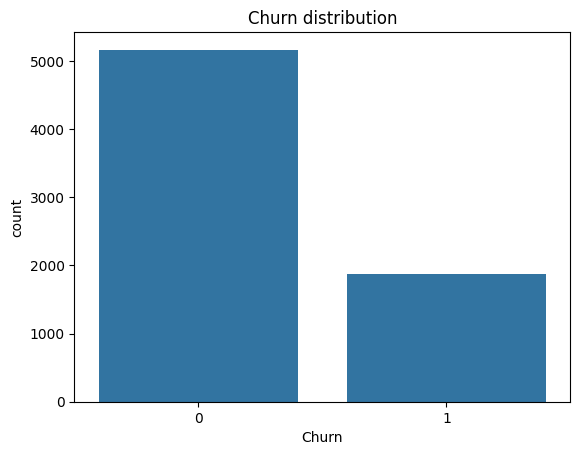

In [60]:
### Lets visualize the churn dataset using visualization packages: matplotlib, seaborn

perc_churn = (data['Churn']== 1/data['Churn'])*100 

sns.countplot(data=data, x='Churn')
plt.title('Churn distribution')
plt.show()


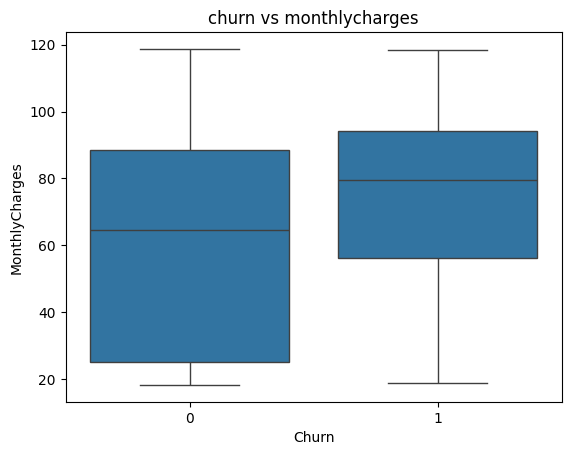

In [16]:
# Explore relationships between churn rate and monthlycharges, tenure and contract type
sns.boxplot(data=data, x='Churn', y= 'MonthlyCharges')
plt.title('churn vs monthlycharges')
plt.show()


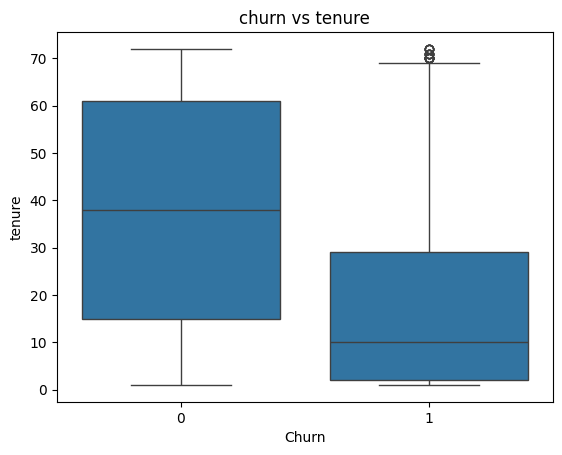

In [ ]:
# Explore relationship between churn and tenure
sns.boxplot(data = data, x= 'Churn', y='tenure')
plt.title('churn vs tenure')
plt.show()

#### correlation